In [1]:
import pandas as pd

In [2]:
data=pd.read_excel('../Data/Model_Data.xlsx')

In [3]:
data.head(5)

Date  Active_Rig_Count  Offshore_Rig_Supply  Offshore_Rig_Active  \
0 1975-01-01              2694                  NaN                  NaN   
1 1975-02-01              2718                  NaN                  NaN   
2 1975-03-01              2769                  NaN                  NaN   
3 1975-04-01              2593                  NaN                  NaN   
4 1975-05-01              2557                  NaN                  NaN   

   Offshore_Utilization_Rate  Land_Rig_Count  Crude_Price_2010_USD  \
0                        NaN             NaN                 46.53   
1                        NaN             NaN                 46.27   
2                        NaN             NaN                 46.09   
3                        NaN             NaN                 45.92   
4                        NaN             NaN                 45.83   

   World_Petrol_Cunsump  World_Petrol_Production  
0             47035.548                47035.548  
1             46047.671                46047.671  
2             46091.935                46091.935  
3             45721.056                45721.056  
4             46119.653                46119.653

In [4]:
data.dropna(inplace=True, how='any')

In [5]:
data.columns

Index(['Date', 'Active_Rig_Count', 'Offshore_Rig_Supply',
       'Offshore_Rig_Active', 'Offshore_Utilization_Rate', 'Land_Rig_Count',
       'Crude_Price_2010_USD', 'World_Petrol_Cunsump',
       'World_Petrol_Production'],
      dtype='object')

In [6]:
X=data[['Offshore_Utilization_Rate', 'Land_Rig_Count',
       'Crude_Price_2010_USD', 'World_Petrol_Cunsump',
       'World_Petrol_Production']]

In [7]:
y=data[['Active_Rig_Count']]

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42) # can't stratify=y cuz sample size too small

In [10]:
from sklearn.preprocessing import StandardScaler

In [11]:
X_scaler=StandardScaler().fit(X_train)
X_train_scaled=X_scaler.transform(X_train)
X_test_scaled=X_scaler.transform(X_test)

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
model=LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
model.score(X_train_scaled,y_train)

0.9968798752854675

In [15]:
model.score(X_test_scaled,y_test)

0.9956312033322654

In [27]:
predictions=model.predict(X_test_scaled)

In [28]:
df=pd.DataFrame({'Actual':y_test.values.tolist(),'Predicted':predictions.tolist()})
df

Actual             Predicted
0    [1755]   [1729.124275442024]
1    [2457]  [2481.6584401417895]
2    [2089]  [2094.2335899844857]
3    [2144]   [2144.807059562172]
4    [1735]  [1735.0792359891623]
5    [1549]  [1524.1716782032179]
6    [1914]  [1918.8086367615747]
7    [3362]  [3287.0651040140906]
8    [1551]  [1471.7219006361076]
9    [3207]  [3222.7425590907737]
10   [1424]  [1353.9094492937722]
11   [1557]  [1560.4538583319825]
12   [1987]   [1981.864634800771]
13   [2271]  [2293.6121341167645]
14   [1573]  [1574.5936895347766]
15   [3352]   [3370.008711862478]
16   [2011]   [1998.029438537533]
17   [2557]   [2429.311118108728]
18   [1823]  [1882.0033716529601]
19   [1974]   [1961.799749210697]
20   [2037]   [2020.256901319484]
21   [2213]   [2229.161092400429]
22   [3125]   [3134.125957610501]
23   [2617]   [2611.319436012906]
24   [3516]   [3495.587010345638]
25   [3103]   [3138.941367907643]
26   [1853]  [1822.6572635627062]
27   [1904]   [1905.820337352582]
28   [1773]  [1772.0284436245743]
29   [1909]  [1944.8980150906027]
..      ...                   ...
72   [1615]  [1583.8423365508575]
73   [2129]  [2127.2192858063986]
74   [2215]   [2248.114252810007]
75   [2144]   [2176.829618698683]
76   [1866]  [1848.2300907984845]
77   [1525]  [1512.4006554063542]
78   [3174]   [3203.971286450458]
79   [2221]   [2220.625215546789]
80   [1918]  [1940.7580775553765]
81   [2136]   [2018.627787483414]
82   [2485]  [2503.5688853429156]
83   [3123]  [3130.6837471860626]
84   [1785]   [1846.243871428014]
85   [1902]  [1902.1674066073394]
86   [1742]  [1778.0131639922786]
87   [2171]   [2080.929800713103]
88   [2084]  [2052.8067230877955]
89   [3335]  [3319.2191402982403]
90   [2144]   [2159.014580085856]
91   [2081]  [2097.2878140943167]
92   [1732]  [1715.7018168014956]
93   [3277]   [3213.251473573597]
94   [1876]  [1916.7900082521755]
95   [2266]  [2284.7919349014055]
96   [2282]  [2305.5500128719596]
97   [2212]   [2182.936698769487]
98   [2979]   [3000.764793652582]
99   [1935]  [1945.0797051323673]
100  [2258]  [2291.4061295856527]
101  [2477]  [2491.5621110603174]

[102 rows x 2 columns]

In [29]:
import shap

In [31]:
explainer = shap.LinearExplainer(model, X_train_scaled, feature_dependence="independent")
shap_values = explainer.shap_values(X_test_scaled)
X_test_scaled_array = X_test_scaled

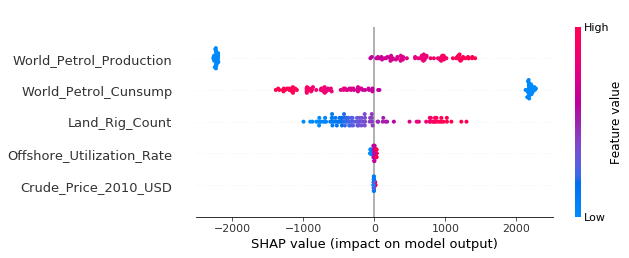

In [33]:
shap.summary_plot(shap_values, X_test_scaled_array, feature_names=X.columns)

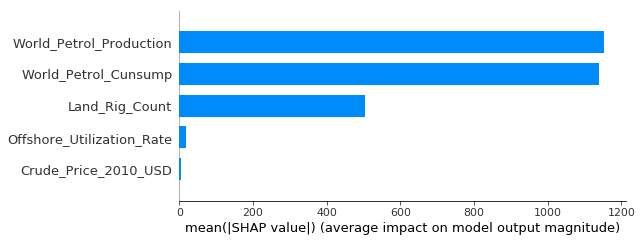

In [34]:
shap.summary_plot(shap_values, X.columns, plot_type="bar")

In [36]:
data.shape

(405, 9)